In [4]:
import pandas as pd
import numpy as np 
from sklearn.datasets import fetch_california_housing

In [5]:
heart=pd.read_csv("Data/heart-disease.csv")

In [6]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
housing=fetch_california_housing()
housing_df=pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
housing_df["target"]=pd.Series(housing["target"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [10]:
X_train.shape

(16512, 8)

In [11]:
np.random.seed(1)
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr.score(X_test, y_test)

0.8073706744897567

In [12]:
X = heart.drop("target", axis=1)
y = heart["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8032786885245902

In [13]:
from sklearn.model_selection import cross_val_score
np.random.seed(4)
np.mean(cross_val_score(clf, X,y, cv=5))

0.8150273224043716

In [14]:
y_probs=clf.predict_proba(X_test)
y_probs[:10]

array([[0.91, 0.09],
       [0.55, 0.45],
       [0.78, 0.22],
       [0.86, 0.14],
       [0.29, 0.71],
       [0.11, 0.89],
       [0.55, 0.45],
       [0.53, 0.47],
       [0.7 , 0.3 ],
       [0.28, 0.72]])

In [15]:
y_probs_positive=y_probs[:,1]
y_probs_positive[:10]

array([0.09, 0.45, 0.22, 0.14, 0.71, 0.89, 0.45, 0.47, 0.3 , 0.72])

In [16]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03225806,
       0.03225806, 0.03225806, 0.09677419, 0.09677419, 0.12903226,
       0.16129032, 0.16129032, 0.19354839, 0.19354839, 0.22580645,
       0.22580645, 0.29032258, 0.35483871, 0.38709677, 0.4516129 ,
       0.4516129 , 0.51612903, 0.64516129, 0.70967742, 0.80645161,
       0.87096774, 0.96774194, 1.        ])

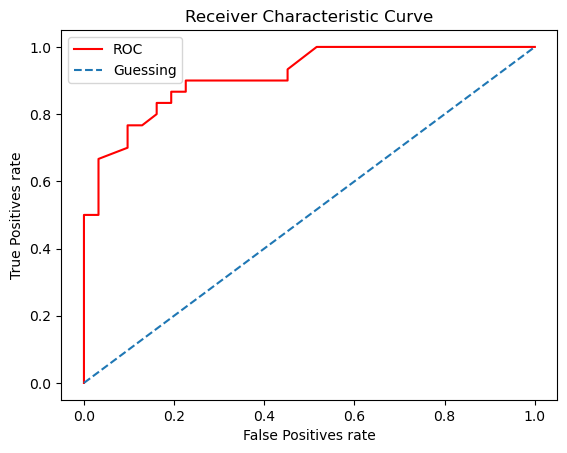

In [17]:
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr, color="red", label="ROC")
    plt.plot([0,1], linestyle="--", label="Guessing")
    
    plt.xlabel("False Positives rate")
    plt.ylabel("True Positives rate")
    plt.title("Receiver Characteristic Curve")
    
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [18]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.914516129032258

In [19]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[22,  9],
       [ 3, 27]], dtype=int64)

In [20]:
pd.crosstab(y_test,y_preds
)

col_0,0,1
target,,
0,22,9
1,3,27


In [21]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Retrieving notices: ...working... done
Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.1.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.1.0




In [23]:
!conda install conda=24.1.0

^C


<Axes: >

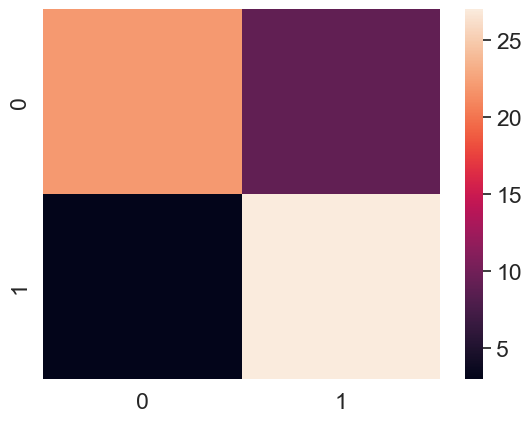

In [31]:
import seaborn as sns
conf_mat = confusion_matrix(y_test, y_preds)
sns.set(font_scale=1.5)
sns.heatmap(conf_mat)